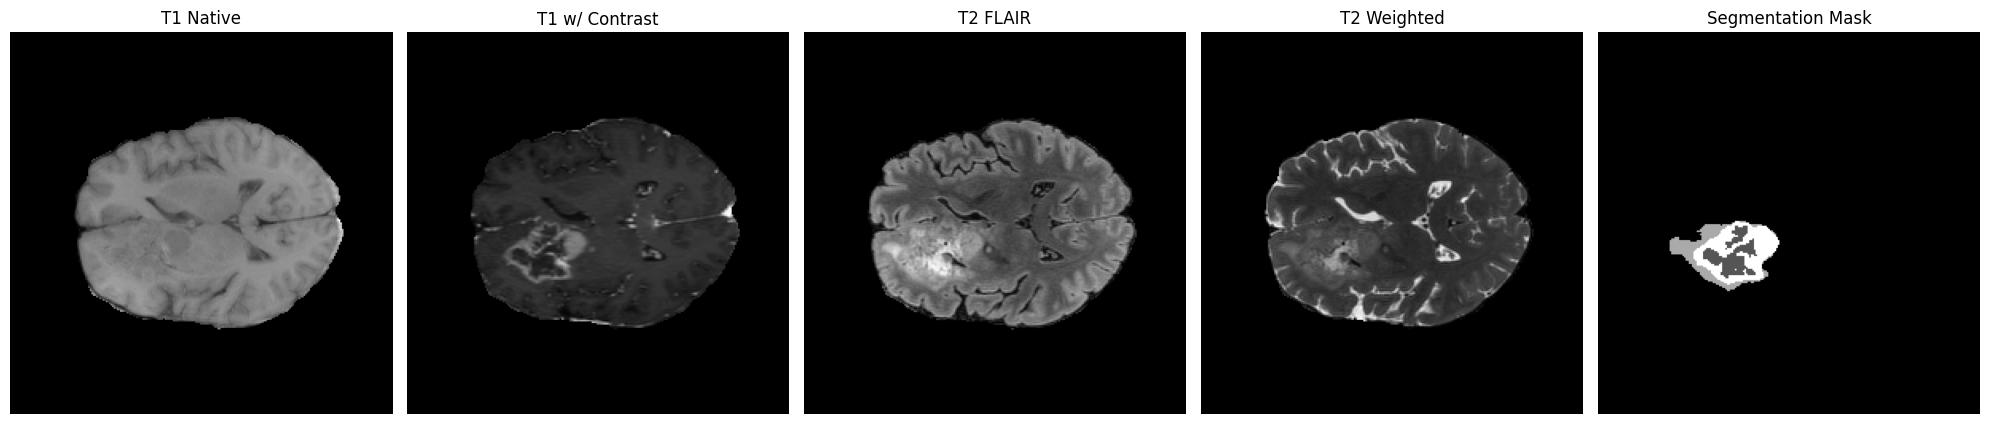

In [1]:
import nibabel as nib
import matplotlib.pyplot as plt
import os

# Path to one subject's folder (adjust this if needed)
subject_folder = '../data_original/raw/GLI-Training/BraTS-GLI-00000-000'

# Load the four MRI modalities
t1n_img = nib.load(os.path.join(subject_folder, 'BraTS-GLI-00000-000-t1n.nii.gz')).get_fdata()
t1c_img = nib.load(os.path.join(subject_folder, 'BraTS-GLI-00000-000-t1c.nii.gz')).get_fdata()
t2f_img = nib.load(os.path.join(subject_folder, 'BraTS-GLI-00000-000-t2f.nii.gz')).get_fdata()
t2w_img = nib.load(os.path.join(subject_folder, 'BraTS-GLI-00000-000-t2w.nii.gz')).get_fdata()

# Load the segmentation mask
seg_img = nib.load(os.path.join(subject_folder, 'BraTS-GLI-00000-000-seg.nii.gz')).get_fdata()

# Pick a slice number (in the middle)
slice_idx = t1n_img.shape[2] // 2

# Plot the modalities and mask
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

axes[0].imshow(t1n_img[:, :, slice_idx], cmap='gray')
axes[0].set_title('T1 Native')

axes[1].imshow(t1c_img[:, :, slice_idx], cmap='gray')
axes[1].set_title('T1 w/ Contrast')

axes[2].imshow(t2f_img[:, :, slice_idx], cmap='gray')
axes[2].set_title('T2 FLAIR')

axes[3].imshow(t2w_img[:, :, slice_idx], cmap='gray')
axes[3].set_title('T2 Weighted')

axes[4].imshow(seg_img[:, :, slice_idx], cmap='gray')
axes[4].set_title('Segmentation Mask')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()

In [1]:
import sys
sys.path.append('..')  # Go up one folder to project root

from models.dataset import BraTSDataset
from torch.utils.data import DataLoader

dataset = BraTSDataset(root_dir='../data_original/raw/GLI-Training')
loader = DataLoader(dataset, batch_size=4, shuffle=True)

# Test one batch
for images, masks in loader:
    print(images.shape)  # Should be [4, 4, H, W]
    print(masks.shape)   # Should be [4, 1, H, W]
    break

torch.Size([4, 4, 240, 240])
torch.Size([4, 1, 240, 240])


In [4]:
import torch
from models.unet import UNet

model = UNet(in_channels=4, out_channels=1)

# Dummy input: batch_size=4, channels=4, height=240, width=240
x = torch.randn(4, 4, 240, 240)
out = model(x)

print(out.shape)  # Should be [4, 1, 240, 240]


torch.Size([4, 1, 240, 240])
